## Import Library 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [2]:
data = pd.read_csv('Mall_Customers.csv')

### Explore the data 

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


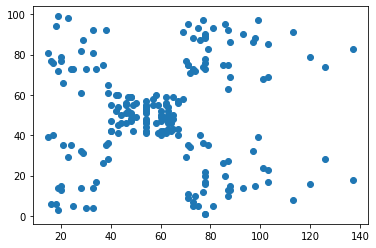

In [6]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],marker='o')

In [8]:
X = data.iloc[:, [3, 4]].values

## Model fit

In [9]:
from sklearn.cluster import KMeans
k_range = range(1,10)
sse = [] # sse   is sum of square error
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)## inertia store the sum of square error of model

## Plot the graph b/w sum of square error & no of cluster

Text(0, 0.5, 'sum of square error')

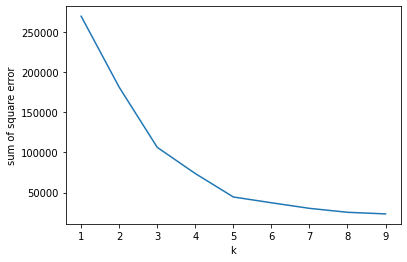

In [10]:
plt.plot(k_range,sse)
plt.xlabel('k')
plt.ylabel('sum of square error')

for select the no of cluster we are using albow technique 

## Fit te Model

In [11]:
km = KMeans(n_clusters=5,random_state=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [12]:
km.inertia_

44448.45544793371

In [13]:
km.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [14]:
y_pred = km.predict(X)

In [15]:
data['cluster'] = y_pred

In [16]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


## Graph of cluster 

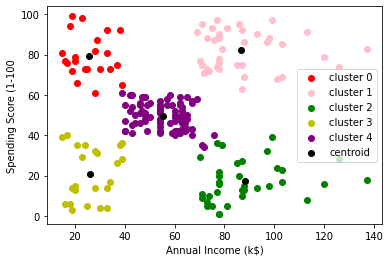

In [18]:
df0 = data[data['cluster']==0]
df1 = data[data['cluster']==1]
df2 = data[data['cluster']==2]
df3 = data[data['cluster']==3]
df4 = data[data['cluster']==4]

plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],label='cluster 0',c='r')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='cluster 1',c='pink')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='cluster 2',c='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='cluster 3',c='y')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='cluster 4',c='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',label = 'centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.legend()
